<a href="https://colab.research.google.com/github/ruheyun/python_pytorch/blob/main/Unet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms

In [2]:
def crop(image, size):
    transform = transforms.CenterCrop(size)
    return transform(image)

In [3]:
class Unet(nn.Module):
    def __init__(self):
        super(Unet, self).__init__()
        self.block1 = nn.Sequential(
            nn.Conv2d(1, 64, kernel_size=3, stride=1, padding=0),
            nn.ReLU(),
            nn.Conv2d(64, 64, kernel_size=3, stride=1, padding=0),
            nn.ReLU()
        )
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)

        self.block2 = nn.Sequential(
            nn.Conv2d(64, 128, 3, 1, 0),
            nn.ReLU(),
            nn.Conv2d(128, 128, 3, 1, 0),
            nn.ReLU()
        )
        self.pool2 = nn.MaxPool2d(2, 2)

        self.block3 = nn.Sequential(
            nn.Conv2d(128, 256, 3, 1, 0),
            nn.ReLU(),
            nn.Conv2d(256, 256, 3, 1, 0),
            nn.ReLU()
        )
        self.pool3 = nn.MaxPool2d(2, 2)

        self.block4 = nn.Sequential(
            nn.Conv2d(256, 512, 3, 1, 0),
            nn.ReLU(),
            nn.Conv2d(512, 512, 3, 1, 0),
            nn.ReLU()
        )
        self.pool4 = nn.MaxPool2d(2, 2)

        self.block5 = nn.Sequential(
            nn.Conv2d(512, 1024, 3, 1, 0),
            nn.ReLU(),
            nn.Conv2d(1024, 1024, 3, 1, 0),
            nn.ReLU()
        )
        self.upconv1 = nn.ConvTranspose2d(1024, 512, 2, 2, 0)

        self.block6 = nn.Sequential(
            nn.Conv2d(1024, 512, 3, 1, 0),
            nn.ReLU(),
            nn.Conv2d(512, 512, 3, 1, 0),
            nn.ReLU()
        )
        self.upconv2 = nn.ConvTranspose2d(512, 256, 2, 2, 0)

        self.block7 = nn.Sequential(
            nn.Conv2d(512, 256, 3, 1, 0),
            nn.ReLU(),
            nn.Conv2d(256, 256, 3, 1, 0),
            nn.ReLU()
        )
        self.upconv3 = nn.ConvTranspose2d(256, 128, 2, 2, 0)

        self.block8 = nn.Sequential(
            nn.Conv2d(256, 128, 3, 1, 0),
            nn.ReLU(),
            nn.Conv2d(128, 128, 3, 1, 0),
            nn.ReLU()
        )
        self.upconv4 = nn.ConvTranspose2d(128, 64, 2, 2, 0)

        self.block9 = nn.Sequential(
            nn.Conv2d(128, 64, 3, 1, 0),
            nn.ReLU(),
            nn.Conv2d(64, 64, 3, 1, 0),
            nn.ReLU(),
            nn.Conv2d(64, 2, 1, 1, 0)
        )

    def forward(self, x):
        x1 = self.block1(x)
        down1 = self.pool1(x1)

        x2 = self.block2(down1)
        down2 = self.pool2(x2)

        x3 = self.block3(down2)
        down3 = self.pool3(x3)

        x4 = self.block4(down3)
        down4 = self.pool4(x4)

        x5 = self.block5(down4)
        up1 = self.upconv1(x5)
        x4_crop = crop(x4, up1.size(-1))
        up_1 = torch.cat([x4_crop, up1], dim=1)

        x6 = self.block6(up_1)
        up2 = self.upconv2(x6)
        x3_crop = crop(x3, up2.size(-1))
        up_2 = torch.cat([x3_crop, up2], dim=1)

        x7 = self.block7(up_2)
        up3 = self.upconv3(x7)
        x2_crop = crop(x2, up3.size(-1))
        up_3 = torch.cat([x2_crop, up3], dim=1)

        x8 = self.block8(up_3)
        up4 = self.upconv4(x8)
        x1_crop = crop(x1, up4.size(-1))
        up_4 = torch.cat([x1_crop, up4], dim=1)

        x9 = self.block9(up_4)

        return x9

In [4]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
input = torch.ones(1, 1, 572, 572).to(device)
model = Unet().to(device)
out = model(input)
print(out.size())

torch.Size([1, 2, 388, 388])


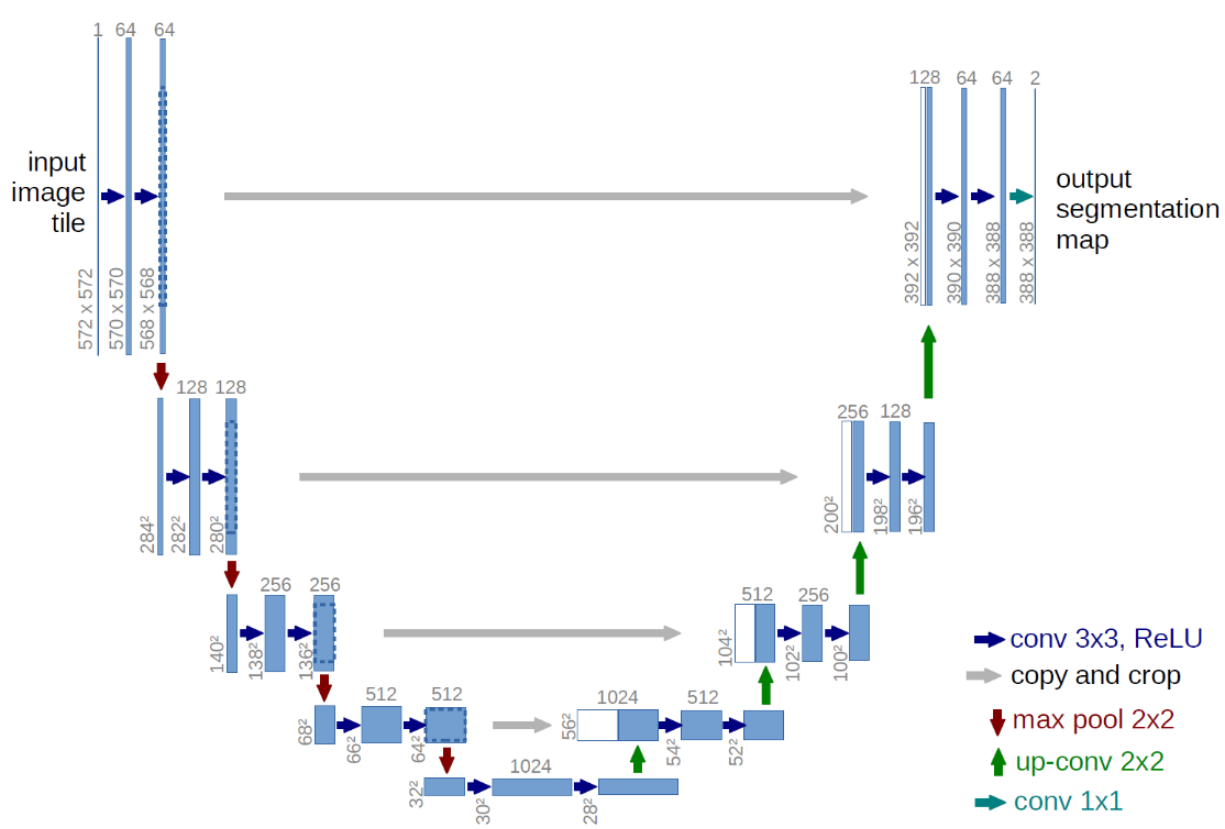